In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [21]:
df=pd.read_csv('Rating_Prediction_dataset.csv')

In [22]:
df.head()

Unnamed: 0                                     Product_Review  Ratings
0           0  It has great sound quality and bass but after ...      1.0
1           1  [BIG UPDATE]IT BROKE ALONG THE RIGHT HINGE, I ...      2.0
2           2  This is a premium quality product from boAt-Li...      5.0
3           3  The boAt Rockerz line is boAt's super cheap li...      1.0
4           4  These are super comfortable and premium lookin...      5.0

In [24]:
df.Ratings.unique()

array([1., 2., 5., 3., 4.])

In [25]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [26]:
df.head()

Product_Review  Ratings
0  It has great sound quality and bass but after ...      1.0
1  [BIG UPDATE]IT BROKE ALONG THE RIGHT HINGE, I ...      2.0
2  This is a premium quality product from boAt-Li...      5.0
3  The boAt Rockerz line is boAt's super cheap li...      1.0
4  These are super comfortable and premium lookin...      5.0

In [28]:
df.shape

(50000, 2)

In [29]:
df.head()

Product_Review  Ratings
0  It has great sound quality and bass but after ...      1.0
1  [BIG UPDATE]IT BROKE ALONG THE RIGHT HINGE, I ...      2.0
2  This is a premium quality product from boAt-Li...      5.0
3  The boAt Rockerz line is boAt's super cheap li...      1.0
4  These are super comfortable and premium lookin...      5.0

In [30]:
df

Product_Review  Ratings
0      It has great sound quality and bass but after ...      1.0
1      [BIG UPDATE]IT BROKE ALONG THE RIGHT HINGE, I ...      2.0
2      This is a premium quality product from boAt-Li...      5.0
3      The boAt Rockerz line is boAt's super cheap li...      1.0
4      These are super comfortable and premium lookin...      5.0
...                                                  ...      ...
49995  Honest rating for this product is 5/5 . Just f...      4.0
49996  I have bought 3 of these little guys, for my s...      5.0
49997  Its a great product. Works really fine. It wil...      4.0
49998  Service is very good , I would say to keep up ...      5.0
49999  Just buy it if u need bigger coverage buy a re...      5.0

[50000 rows x 2 columns]

In [32]:
df.Ratings.value_counts()

5.0    24506
1.0    11232
4.0     8406
3.0     3680
2.0     2176
Name: Ratings, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product_Review  49920 non-null  object 
 1   Ratings         50000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 781.4+ KB


In [34]:
df.dropna(inplace=True)

In [35]:
df

Product_Review  Ratings
0      It has great sound quality and bass but after ...      1.0
1      [BIG UPDATE]IT BROKE ALONG THE RIGHT HINGE, I ...      2.0
2      This is a premium quality product from boAt-Li...      5.0
3      The boAt Rockerz line is boAt's super cheap li...      1.0
4      These are super comfortable and premium lookin...      5.0
...                                                  ...      ...
49995  Honest rating for this product is 5/5 . Just f...      4.0
49996  I have bought 3 of these little guys, for my s...      5.0
49997  Its a great product. Works really fine. It wil...      4.0
49998  Service is very good , I would say to keep up ...      5.0
49999  Just buy it if u need bigger coverage buy a re...      5.0

[49920 rows x 2 columns]

In [37]:
df.Ratings.value_counts()

5.0    24491
1.0    11186
4.0     8404
3.0     3671
2.0     2168
Name: Ratings, dtype: int64

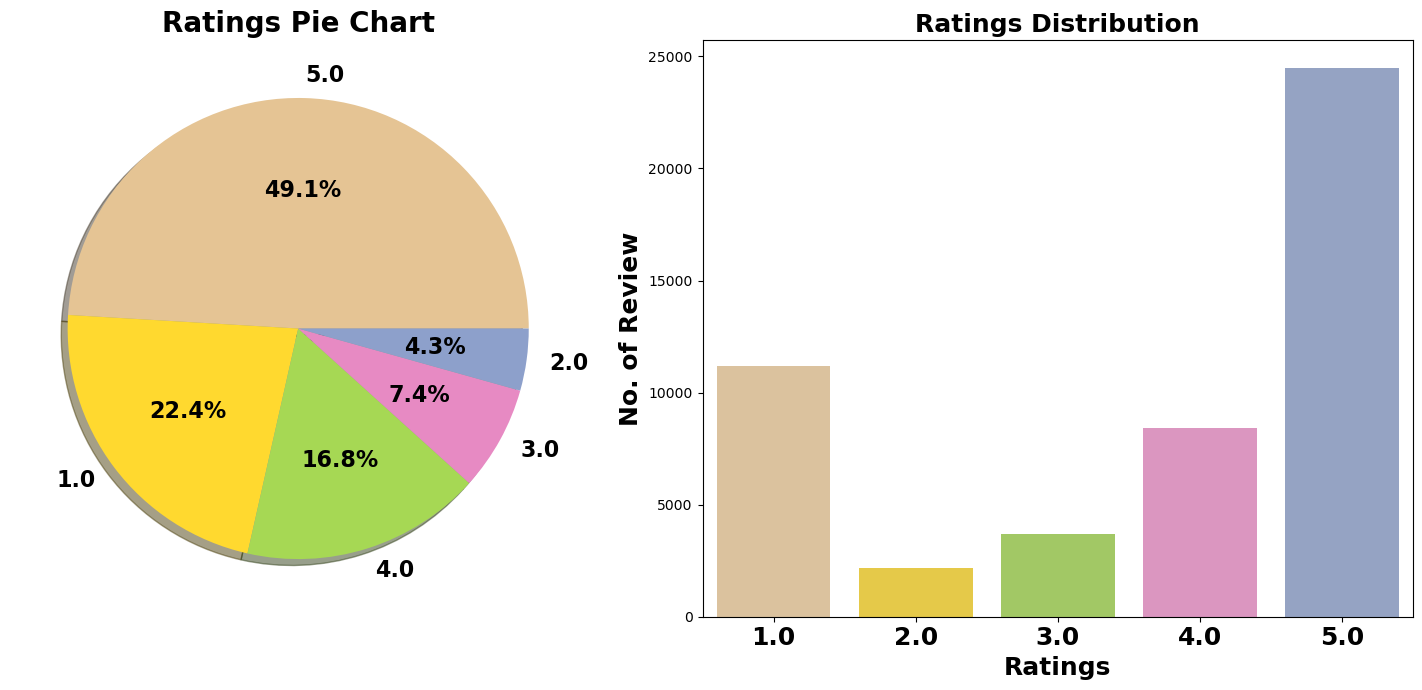

Value Counts of Rating:


5.0    24491
1.0    11186
4.0     8404
3.0     3671
2.0     2168
Name: Ratings, dtype: int64

In [39]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
f,ax=plt.subplots(1,2,figsize=(15,7))
df['Ratings'].value_counts().plot.pie(autopct='%2.1f%%',
                                textprops ={'fontsize':16 ,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Ratings Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Ratings',data=df,ax=ax[1])
ax[1].set_title('Ratings Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Ratings",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Review",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.tight_layout()
plt.show()
print('Value Counts of Rating:')
df['Ratings'].value_counts()

In [40]:
from wordcloud import WordCloud
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer,WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [41]:
def cleantext(df,df_column_name):
    
    df[df_column_name]=df[df_column_name].str.replace(r'^.+@[^.].*.[a-z]{2,}$','email address')
    
    df[df_column_name]=df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','website url')
    
    df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'dollars')
    
    df[df_column_name] = df[df_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','PN')
    
    df[df_column_name] = df[df_column_name].str.replace(r'\d+(\.\d+)?', 'N')
    
    df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')
    
    df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')
    
    df[df_column_name] = df[df_column_name].str.replace(r'^\s+|\s+?$', '')
    
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    df[df_column_name] = df[df_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [43]:
cleantext(df,'Product_Review')

In [44]:
df.head()

Product_Review  Ratings
0  It great sound quality bass N months use got b...      1.0
1  BIG UPDATE IT BROKE ALONG THE RIGHT HINGE I WA...      2.0
2  This premium quality product boAt Lifestyle It...      5.0
3  The boAt Rockerz line boAt super cheap lineup ...      1.0
4  These super comfortable premium looking headph...      5.0

In [46]:
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
df['Product_Review']=df['Product_Review'].apply(lambda x:tokenizer.tokenize(x.lower()))
df.head()

Product_Review  Ratings
0  [it, great, sound, quality, bass, n, months, u...      1.0
1  [big, update, it, broke, along, the, right, hi...      2.0
2  [this, premium, quality, product, boat, lifest...      5.0
3  [the, boat, rockerz, line, boat, super, cheap,...      1.0
4  [these, super, comfortable, premium, looking, ...      5.0

In [47]:
stemmer=SnowballStemmer("english")
lemmatizer=WordNetLemmatizer()
import gensim
def stemmer_lemmatizer(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

def preprocess(text):
    result=[]
    for token in text:
        if(len(token)>=3):
            result.append(stemmer_lemmatizer(token))
    return result

In [50]:
df['clean_review']=df['Product_Review'].apply(preprocess)

In [52]:
df.head()

Product_Review  Ratings  \
0  great sound qualiti bass month use get break w...      1.0   
1  big updat break along the right hing be wear n...      2.0   
2  this premium qualiti product boat lifestyl pro...      5.0   
3  the boat rockerz line boat super cheap lineup ...      1.0   
4  these super comfort premium look headphon beau...      5.0   

                                        clean_review  
0  [great, sound, qualiti, bass, month, use, get,...  
1  [big, updat, break, along, the, right, hing, b...  
2  [this, premium, qualiti, product, boat, lifest...  
3  [the, boat, rockerz, line, boat, super, cheap,...  
4  [these, super, comfort, premium, look, headpho...

In [53]:
df['Product_Review']=df['clean_review'].apply(lambda x:' '.join(y for y in x))

In [54]:
df.head()

Product_Review  Ratings  \
0  great sound qualiti bass month use get break w...      1.0   
1  big updat break along the right hing be wear n...      2.0   
2  this premium qualiti product boat lifestyl pro...      5.0   
3  the boat rockerz line boat super cheap lineup ...      1.0   
4  these super comfort premium look headphon beau...      5.0   

                                        clean_review  
0  [great, sound, qualiti, bass, month, use, get,...  
1  [big, updat, break, along, the, right, hing, b...  
2  [this, premium, qualiti, product, boat, lifest...  
3  [the, boat, rockerz, line, boat, super, cheap,...  
4  [these, super, comfort, premium, look, headpho...

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49920 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product_Review  49920 non-null  object 
 1   Ratings         49920 non-null  float64
 2   clean_review    49920 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.5+ MB


In [56]:
df['Ratings']=df['Ratings'].astype(int)

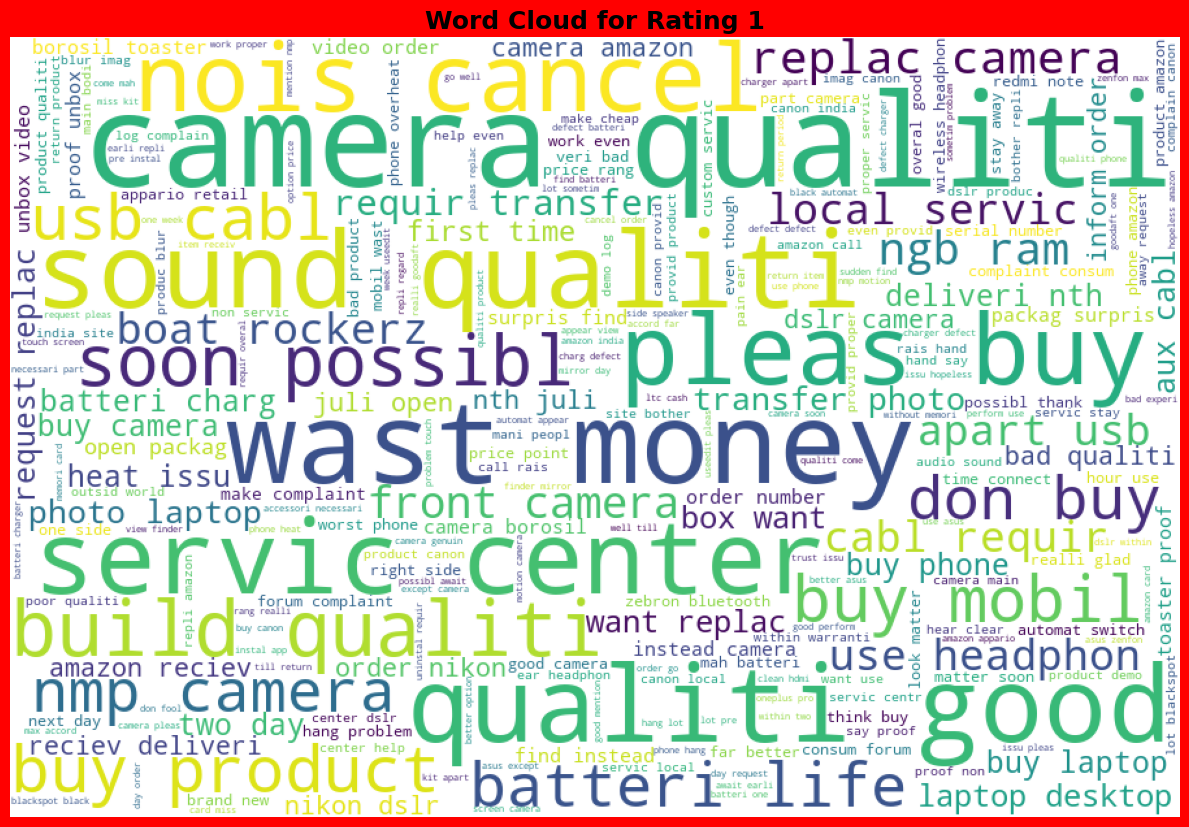

In [58]:
#Getting sense of words in Rating 1
one = df['Product_Review'][df['Ratings']==1]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 1',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

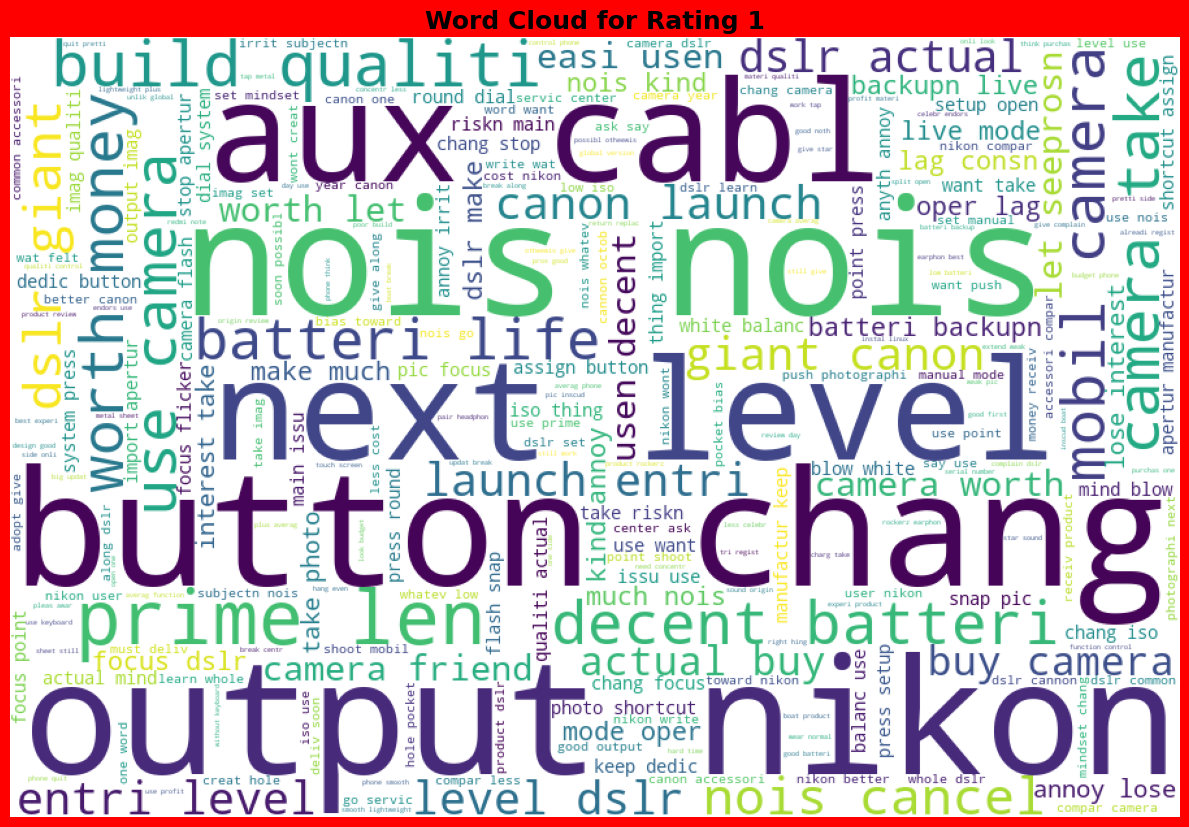

In [59]:
two = df['Product_Review'][df['Ratings']==2]
two_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(two))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(two_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 1',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

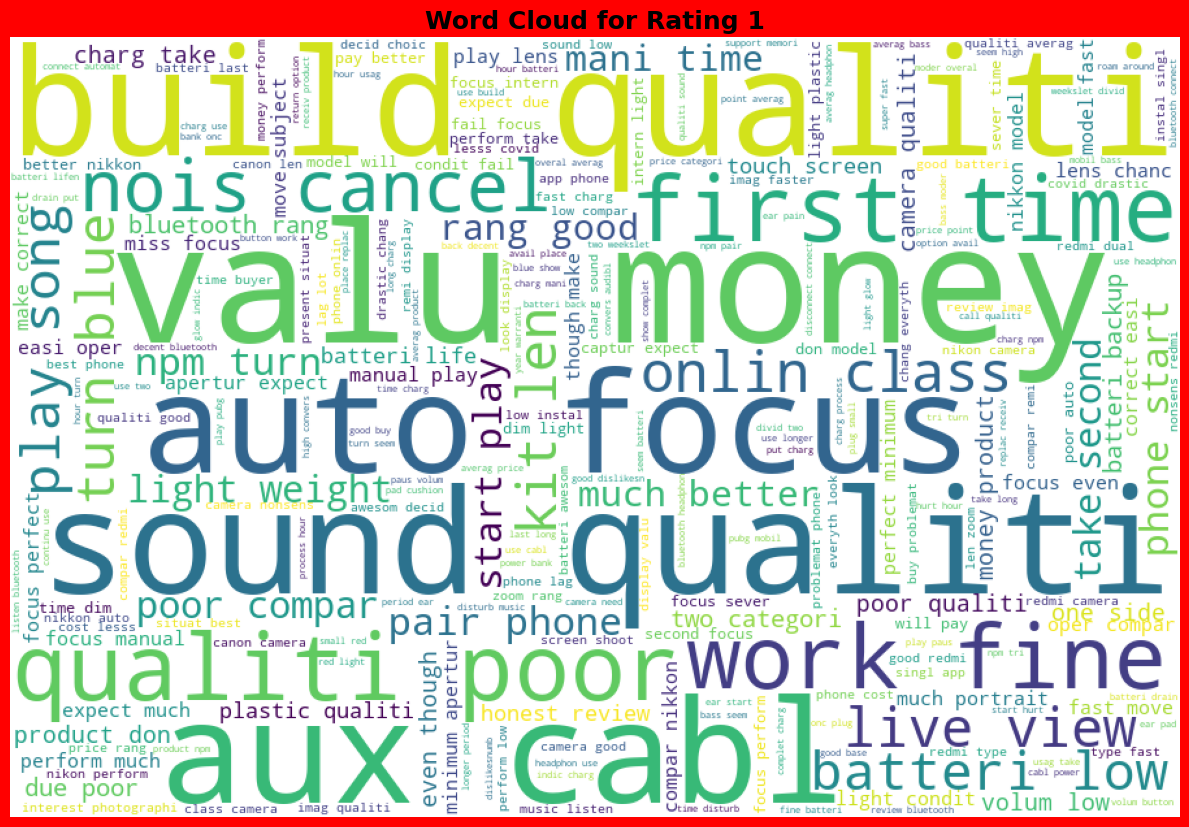

In [60]:
two = df['Product_Review'][df['Ratings']==3]
two_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(two))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(two_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 1',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

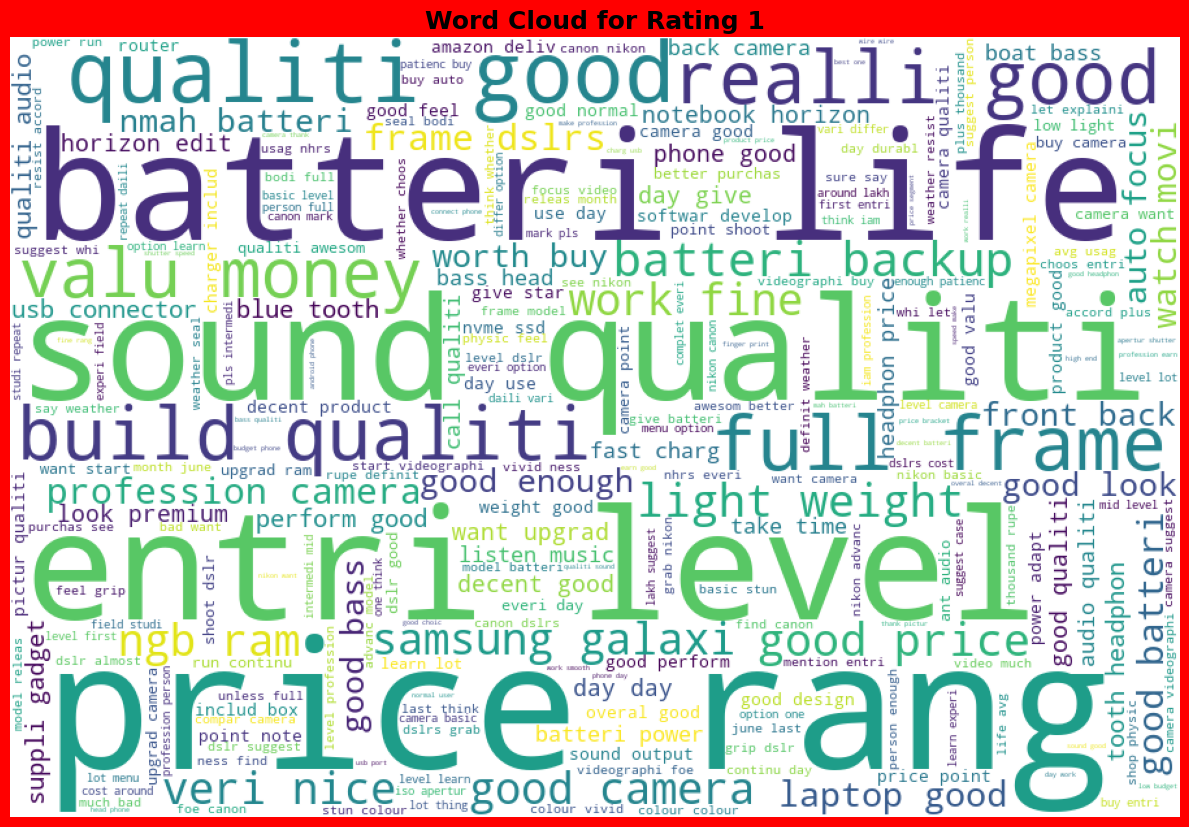

In [61]:
two = df['Product_Review'][df['Ratings']==4]
two_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(two))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(two_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 1',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

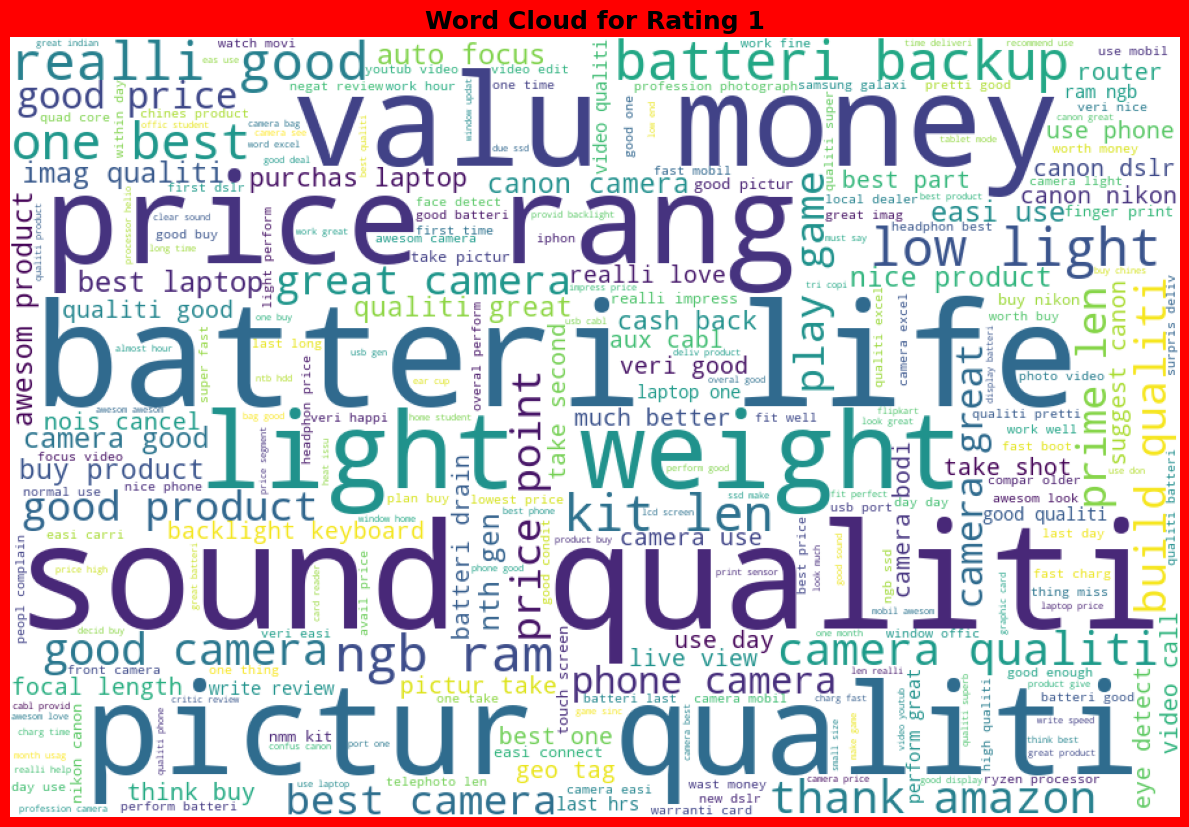

In [62]:
two = df['Product_Review'][df['Ratings']==5]
two_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(two))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(two_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 1',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

In [64]:
tf=TfidfVectorizer()
features=tf.fit_transform(df['Product_Review'])
x=features
y=df['Ratings']

In [65]:
x.shape

(49920, 5834)

In [66]:
y.shape

(49920,)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(x_train,y_train)
    y_pred=log_reg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.907051282051282 on Random_state 71


In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=71, test_size=.3)
print('Training feature matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (34944, 5834)
Training target vector size: (34944,)
Test feature matrix size: (14976, 5834)
Test target vector size: (14976,)


In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=71, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.907051282051282


Confusion matrix of Logistics Regression : 
 [[3376    9    4   13   31]
 [  35  601    0    0   13]
 [  37    0  787    9  207]
 [  33    1    8 1706  734]
 [ 112    2   22  122 7114]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           1       0.94      0.98      0.96      3433
           2       0.98      0.93      0.95       649
           3       0.96      0.76      0.85      1040
           4       0.92      0.69      0.79      2482
           5       0.88      0.97      0.92      7372

    accuracy                           0.91     14976
   macro avg       0.94      0.86      0.89     14976
weighted avg       0.91      0.91      0.90     14976



In [71]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, x, y, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.53685897 0.50170272 0.63261218 0.65084135 0.61227965]
Mean CV Score : 0.5868589743589744
Std deviation : 0.057593223930853414


In [72]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'Decision Tree Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Decision Tree Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Decision Tree Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Decision Tree Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Decision Tree Classifier Evaluation


Accuracy Score of Decision Tree Classifier : 0.8950988247863247


Confusion matrix of Decision Tree Classifier : 
 [[3380    9    4   13   27]
 [  35  601    0    0   13]
 [  32    0  796   27  185]
 [  30    2   26 1837  587]
 [ 125    2  109  345 6791]]


classification Report of Decision Tree Classifier 
               precision    recall  f1-score   support

           1       0.94      0.98      0.96      3433
           2       0.98      0.93      0.95       649
           3       0.85      0.77      0.81      1040
           4       0.83      0.74      0.78      2482
           5       0.89      0.92      0.91      7372

    accuracy                           0.90     14976
   macro avg       0.90      0.87      0.88     14976
weighted avg       0.89      0.90      0.89     14976



In [73]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(dtc, x, y, cv =5)
print('\033[1m'+'Cross Validation Score', dtc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.46163862 0.45643029 0.63141026 0.6176883  0.59284856]
Mean CV Score : 0.5520032051282051
Std deviation : 0.07692632162961743


In [74]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'Random Forest Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Random Forest Classifier


Accuracy Score of Random Forest Classifier : 0.9121928418803419


Confusion matrix of Random Forest Classifier : 
 [[3380    9    4   13   27]
 [  35  601    0    0   13]
 [  25    0  789    6  220]
 [  20    1    7 1752  702]
 [  75    2   30  126 7139]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97      3433
           2       0.98      0.93      0.95       649
           3       0.95      0.76      0.84      1040
           4       0.92      0.71      0.80      2482
           5       0.88      0.97      0.92      7372

    accuracy                           0.91     14976
   macro avg       0.94      0.87      0.90     14976
weighted avg       0.91      0.91      0.91     14976



In [76]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(rfc, x,y, cv =5)
print('\033[1m'+'Cross Validation Score', rfc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.55378606 0.47415865 0.58173077 0.61127804 0.59204728]
Mean CV Score : 0.5626001602564102
Std deviation : 0.047962980964404864


In [77]:
adbc=AdaBoostClassifier()
adbc.fit(X_train,Y_train)
y_pred=adbc.predict(X_test)
print('\033[1m'+'AdaBoost Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of AdaBoost Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of AdaBoost Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of AdaBoost Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

AdaBoost Classifier Evaluation


Accuracy Score of AdaBoost Classifier : 0.5806623931623932


Confusion matrix of AdaBoost Classifier : 
 [[1399    0   82   71 1881]
 [ 264  205    0    0  180]
 [ 129    0  209   18  684]
 [  95    1   16  217 2153]
 [ 424    3   73  206 6666]]


classification Report of AdaBoost Classifier 
               precision    recall  f1-score   support

           1       0.61      0.41      0.49      3433
           2       0.98      0.32      0.48       649
           3       0.55      0.20      0.29      1040
           4       0.42      0.09      0.14      2482
           5       0.58      0.90      0.70      7372

    accuracy                           0.58     14976
   macro avg       0.63      0.38      0.42     14976
weighted avg       0.57      0.58      0.52     14976



In [78]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(adbc, x, y, cv =5)
print('\033[1m'+'Cross Validation Score',adbc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score AdaBoostClassifier() :

CVScore : [0.47686298 0.51812901 0.54126603 0.51872997 0.51652644]
Mean CV Score : 0.5143028846153846
Std deviation : 0.020822775307909092


In [79]:
grad_bc=GradientBoostingClassifier()
grad_bc.fit(X_train,Y_train)
y_pred=grad_bc.predict(X_test)
print('\033[1m'+'Gradient Boosting Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Gradient Boosting Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Gradient Boosting Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Gradient Boosting Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Gradient Boosting Classifier Evaluation


Accuracy Score of Gradient Boosting Classifier : 0.9049145299145299


Confusion matrix of Gradient Boosting Classifier : 
 [[3287    9    4   13  120]
 [  27  601    0    0   21]
 [  27    0  787    4  222]
 [  29    2    7 1679  765]
 [ 123    3   19   29 7198]]


classification Report of Gradient Boosting Classifier 
               precision    recall  f1-score   support

           1       0.94      0.96      0.95      3433
           2       0.98      0.93      0.95       649
           3       0.96      0.76      0.85      1040
           4       0.97      0.68      0.80      2482
           5       0.86      0.98      0.92      7372

    accuracy                           0.90     14976
   macro avg       0.94      0.86      0.89     14976
weighted avg       0.91      0.90      0.90     14976



In [80]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(grad_bc, x, y, cv =5)
print('\033[1m'+'Cross Validation Score', grad_bc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score GradientBoostingClassifier() :

CVScore : [0.57091346 0.56770833 0.65985577 0.64202724 0.59655449]
Mean CV Score : 0.607411858974359
Std deviation : 0.03734962934504652


In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
parameter={
    'loss':['log_loss', 'exponential'],
    'learning_rate':[0.1,1,10],
    'n_estimators':np.arange(1,5),
    'criterion':['friedman_mse', 'squared_error'],
    'min_samples_split':np.arange(2,5),
    'max_depth':np.arange(1,5),
}

In [84]:
GCV = GridSearchCV(GradientBoostingClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5; 1/576] START criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=1
[CV 1/5; 1/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=1;, score=0.490 total time=   0.5s
[CV 2/5; 1/576] START criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=1
[CV 2/5; 1/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=1;, score=0.490 total time=   0.5s
[CV 3/5; 1/576] START criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=1
[CV 3/5; 1/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=1;, score=0.490 total time=   0.5s
[CV 4/5; 1/576] START criterion=friedman_mse, learning_rate=0.1, loss

[CV 4/5; 6/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=2;, score=0.490 total time=   1.1s
[CV 5/5; 6/576] START criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=2
[CV 5/5; 6/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=2;, score=0.490 total time=   1.1s
[CV 1/5; 7/576] START criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=3
[CV 1/5; 7/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=3;, score=0.492 total time=   1.7s
[CV 2/5; 7/576] START criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=3
[CV 2/5; 7/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=3;, scor

[CV 3/5; 12/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=4, n_estimators=4;, score=0.495 total time=   2.2s
[CV 4/5; 12/576] START criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=4, n_estimators=4
[CV 4/5; 12/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=4, n_estimators=4;, score=0.495 total time=   2.2s
[CV 5/5; 12/576] START criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=4, n_estimators=4
[CV 5/5; 12/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=4, n_estimators=4;, score=0.495 total time=   2.2s
[CV 1/5; 13/576] START criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=2, n_estimators=1
[CV 1/5; 13/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=2, n_estimators=1

[CV 2/5; 18/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=2;, score=0.492 total time=   1.5s
[CV 3/5; 18/576] START criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=2
[CV 3/5; 18/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=2;, score=0.492 total time=   1.5s
[CV 4/5; 18/576] START criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=2
[CV 4/5; 18/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=2;, score=0.492 total time=   1.6s
[CV 5/5; 18/576] START criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=2
[CV 5/5; 18/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=2

[CV 1/5; 24/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=4;, score=0.541 total time=   3.1s
[CV 2/5; 24/576] START criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=4
[CV 2/5; 24/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=4;, score=0.559 total time=   3.1s
[CV 3/5; 24/576] START criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=4
[CV 3/5; 24/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=4;, score=0.562 total time=   3.2s
[CV 4/5; 24/576] START criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=4
[CV 4/5; 24/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=4

[CV 5/5; 29/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=1;, score=0.490 total time=   1.1s
[CV 1/5; 30/576] START criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=2
[CV 1/5; 30/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=2;, score=0.490 total time=   2.0s
[CV 2/5; 30/576] START criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=2
[CV 2/5; 30/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=2;, score=0.490 total time=   2.0s
[CV 3/5; 30/576] START criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=2
[CV 3/5; 30/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=2

[CV 4/5; 35/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=3;, score=0.557 total time=   3.0s
[CV 5/5; 35/576] START criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=3
[CV 5/5; 35/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=3;, score=0.558 total time=   3.1s
[CV 1/5; 36/576] START criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=4
[CV 1/5; 36/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=4;, score=0.598 total time=   4.3s
[CV 2/5; 36/576] START criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=4
[CV 2/5; 36/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=4

[CV 3/5; 41/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=3, n_estimators=1;, score=0.490 total time=   1.2s
[CV 4/5; 41/576] START criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=3, n_estimators=1
[CV 4/5; 41/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=3, n_estimators=1;, score=0.490 total time=   1.2s
[CV 5/5; 41/576] START criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=3, n_estimators=1
[CV 5/5; 41/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=3, n_estimators=1;, score=0.490 total time=   1.2s
[CV 1/5; 42/576] START criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=3, n_estimators=2
[CV 1/5; 42/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=3, n_estimators=2

[CV 2/5; 47/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=3;, score=0.588 total time=   3.9s
[CV 3/5; 47/576] START criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=3
[CV 3/5; 47/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=3;, score=0.574 total time=   3.8s
[CV 4/5; 47/576] START criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=3
[CV 4/5; 47/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=3;, score=0.588 total time=   3.7s
[CV 5/5; 47/576] START criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=3
[CV 5/5; 47/576] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=3

[CV 4/5; 56/576] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=1, min_samples_split=3, n_estimators=4;, score=nan total time=   0.0s
[CV 5/5; 56/576] START criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=1, min_samples_split=3, n_estimators=4
[CV 5/5; 56/576] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=1, min_samples_split=3, n_estimators=4;, score=nan total time=   0.0s
[CV 1/5; 57/576] START criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=1, min_samples_split=4, n_estimators=1
[CV 1/5; 57/576] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=1, min_samples_split=4, n_estimators=1;, score=nan total time=   0.0s
[CV 2/5; 57/576] START criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=1, min_samples_split=4, n_estimators=1
[CV 2/5; 57/576] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=1, min_samples_split=4,

[CV 4/5; 64/576] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=2, min_samples_split=2, n_estimators=4;, score=nan total time=   0.0s
[CV 5/5; 64/576] START criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=2, min_samples_split=2, n_estimators=4
[CV 5/5; 64/576] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=2, min_samples_split=2, n_estimators=4;, score=nan total time=   0.0s
[CV 1/5; 65/576] START criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=2, min_samples_split=3, n_estimators=1
[CV 1/5; 65/576] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=2, min_samples_split=3, n_estimators=1;, score=nan total time=   0.0s
[CV 2/5; 65/576] START criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=2, min_samples_split=3, n_estimators=1
[CV 2/5; 65/576] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=2, min_samples_split=3,

[CV 4/5; 72/576] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=2, min_samples_split=4, n_estimators=4;, score=nan total time=   0.0s
[CV 5/5; 72/576] START criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=2, min_samples_split=4, n_estimators=4
[CV 5/5; 72/576] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=2, min_samples_split=4, n_estimators=4;, score=nan total time=   0.0s
[CV 1/5; 73/576] START criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=3, min_samples_split=2, n_estimators=1
[CV 1/5; 73/576] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=3, min_samples_split=2, n_estimators=1;, score=nan total time=   0.0s
[CV 2/5; 73/576] START criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=3, min_samples_split=2, n_estimators=1
[CV 2/5; 73/576] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=3, min_samples_split=2,

[CV 4/5; 80/576] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=3, min_samples_split=3, n_estimators=4;, score=nan total time=   0.0s
[CV 5/5; 80/576] START criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=3, min_samples_split=3, n_estimators=4
[CV 5/5; 80/576] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=3, min_samples_split=3, n_estimators=4;, score=nan total time=   0.0s
[CV 1/5; 81/576] START criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=3, min_samples_split=4, n_estimators=1
[CV 1/5; 81/576] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=3, min_samples_split=4, n_estimators=1;, score=nan total time=   0.0s
[CV 2/5; 81/576] START criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=3, min_samples_split=4, n_estimators=1
[CV 2/5; 81/576] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=3, min_samples_split=4,

[CV 4/5; 88/576] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=4, min_samples_split=2, n_estimators=4;, score=nan total time=   0.0s
[CV 5/5; 88/576] START criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=4, min_samples_split=2, n_estimators=4
[CV 5/5; 88/576] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=4, min_samples_split=2, n_estimators=4;, score=nan total time=   0.0s
[CV 1/5; 89/576] START criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=4, min_samples_split=3, n_estimators=1
[CV 1/5; 89/576] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=4, min_samples_split=3, n_estimators=1;, score=nan total time=   0.0s
[CV 2/5; 89/576] START criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=4, min_samples_split=3, n_estimators=1
[CV 2/5; 89/576] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=4, min_samples_split=3,

[CV 5/5; 96/576] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=4, min_samples_split=4, n_estimators=4;, score=nan total time=   0.0s
[CV 1/5; 97/576] START criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=1
[CV 1/5; 97/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=1;, score=0.547 total time=   0.5s
[CV 2/5; 97/576] START criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=1
[CV 2/5; 97/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=1;, score=0.543 total time=   0.5s
[CV 3/5; 97/576] START criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=1
[CV 3/5; 97/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=1;, score=0.

[CV 4/5; 102/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=2;, score=0.583 total time=   1.1s
[CV 5/5; 102/576] START criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=2
[CV 5/5; 102/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=2;, score=0.582 total time=   1.2s
[CV 1/5; 103/576] START criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=3
[CV 1/5; 103/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=3;, score=0.628 total time=   1.7s
[CV 2/5; 103/576] START criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=3
[CV 2/5; 103/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=3;, scor

[CV 3/5; 108/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=4, n_estimators=4;, score=0.636 total time=   2.2s
[CV 4/5; 108/576] START criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=4, n_estimators=4
[CV 4/5; 108/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=4, n_estimators=4;, score=0.643 total time=   2.4s
[CV 5/5; 108/576] START criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=4, n_estimators=4
[CV 5/5; 108/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=4, n_estimators=4;, score=0.643 total time=   2.3s
[CV 1/5; 109/576] START criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=2, n_estimators=1
[CV 1/5; 109/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=2, n_estimators=1;, scor

[CV 2/5; 114/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=2;, score=0.665 total time=   1.5s
[CV 3/5; 114/576] START criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=2
[CV 3/5; 114/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=2;, score=0.670 total time=   1.5s
[CV 4/5; 114/576] START criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=2
[CV 4/5; 114/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=2;, score=0.651 total time=   1.5s
[CV 5/5; 114/576] START criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=2
[CV 5/5; 114/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=2;, scor

[CV 1/5; 120/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=4;, score=0.735 total time=   3.1s
[CV 2/5; 120/576] START criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=4
[CV 2/5; 120/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=4;, score=0.715 total time=   3.3s
[CV 3/5; 120/576] START criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=4
[CV 3/5; 120/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=4;, score=0.731 total time=   3.1s
[CV 4/5; 120/576] START criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=4
[CV 4/5; 120/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=4;, scor

[CV 5/5; 125/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=1;, score=0.636 total time=   0.9s
[CV 1/5; 126/576] START criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=2
[CV 1/5; 126/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=2;, score=0.718 total time=   2.0s
[CV 2/5; 126/576] START criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=2
[CV 2/5; 126/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=2;, score=0.716 total time=   2.0s
[CV 3/5; 126/576] START criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=2
[CV 3/5; 126/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=2;, scor

[CV 4/5; 131/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=3;, score=0.755 total time=   3.1s
[CV 5/5; 131/576] START criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=3
[CV 5/5; 131/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=3;, score=0.754 total time=   3.0s
[CV 1/5; 132/576] START criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=4
[CV 1/5; 132/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=4;, score=0.793 total time=   4.0s
[CV 2/5; 132/576] START criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=4
[CV 2/5; 132/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=4;, scor

[CV 3/5; 137/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=4, min_samples_split=3, n_estimators=1;, score=0.680 total time=   1.2s
[CV 4/5; 137/576] START criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=4, min_samples_split=3, n_estimators=1
[CV 4/5; 137/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=4, min_samples_split=3, n_estimators=1;, score=0.667 total time=   1.2s
[CV 5/5; 137/576] START criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=4, min_samples_split=3, n_estimators=1
[CV 5/5; 137/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=4, min_samples_split=3, n_estimators=1;, score=0.667 total time=   1.2s
[CV 1/5; 138/576] START criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=4, min_samples_split=3, n_estimators=2
[CV 1/5; 138/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=4, min_samples_split=3, n_estimators=2;, scor

[CV 2/5; 143/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=3;, score=0.804 total time=   3.8s
[CV 3/5; 143/576] START criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=3
[CV 3/5; 143/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=3;, score=0.806 total time=   3.7s
[CV 4/5; 143/576] START criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=3
[CV 4/5; 143/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=3;, score=0.792 total time=   3.7s
[CV 5/5; 143/576] START criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=3
[CV 5/5; 143/576] END criterion=friedman_mse, learning_rate=1, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=3;, scor

[CV 5/5; 151/576] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=1, min_samples_split=3, n_estimators=3;, score=nan total time=   0.0s
[CV 1/5; 152/576] START criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=1, min_samples_split=3, n_estimators=4
[CV 1/5; 152/576] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=1, min_samples_split=3, n_estimators=4;, score=nan total time=   0.0s
[CV 2/5; 152/576] START criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=1, min_samples_split=3, n_estimators=4
[CV 2/5; 152/576] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=1, min_samples_split=3, n_estimators=4;, score=nan total time=   0.0s
[CV 3/5; 152/576] START criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=1, min_samples_split=3, n_estimators=4
[CV 3/5; 152/576] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=1, min_samples_split=3, n_esti

[CV 4/5; 159/576] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=2, min_samples_split=2, n_estimators=3;, score=nan total time=   0.0s
[CV 5/5; 159/576] START criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=2, min_samples_split=2, n_estimators=3
[CV 5/5; 159/576] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=2, min_samples_split=2, n_estimators=3;, score=nan total time=   0.0s
[CV 1/5; 160/576] START criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=2, min_samples_split=2, n_estimators=4
[CV 1/5; 160/576] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=2, min_samples_split=2, n_estimators=4;, score=nan total time=   0.0s
[CV 2/5; 160/576] START criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=2, min_samples_split=2, n_estimators=4
[CV 2/5; 160/576] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=2, min_samples_split=2, n_esti

[CV 3/5; 167/576] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=2, min_samples_split=4, n_estimators=3;, score=nan total time=   0.0s
[CV 4/5; 167/576] START criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=2, min_samples_split=4, n_estimators=3
[CV 4/5; 167/576] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=2, min_samples_split=4, n_estimators=3;, score=nan total time=   0.0s
[CV 5/5; 167/576] START criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=2, min_samples_split=4, n_estimators=3
[CV 5/5; 167/576] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=2, min_samples_split=4, n_estimators=3;, score=nan total time=   0.0s
[CV 1/5; 168/576] START criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=2, min_samples_split=4, n_estimators=4
[CV 1/5; 168/576] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=2, min_samples_split=4, n_esti

[CV 1/5; 175/576] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=3, min_samples_split=3, n_estimators=3;, score=nan total time=   0.0s
[CV 2/5; 175/576] START criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=3, min_samples_split=3, n_estimators=3
[CV 2/5; 175/576] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=3, min_samples_split=3, n_estimators=3;, score=nan total time=   0.0s
[CV 3/5; 175/576] START criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=3, min_samples_split=3, n_estimators=3
[CV 3/5; 175/576] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=3, min_samples_split=3, n_estimators=3;, score=nan total time=   0.0s
[CV 4/5; 175/576] START criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=3, min_samples_split=3, n_estimators=3
[CV 4/5; 175/576] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=3, min_samples_split=3, n_esti

[CV 1/5; 183/576] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=4, min_samples_split=2, n_estimators=3;, score=nan total time=   0.0s
[CV 2/5; 183/576] START criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=4, min_samples_split=2, n_estimators=3
[CV 2/5; 183/576] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=4, min_samples_split=2, n_estimators=3;, score=nan total time=   0.0s
[CV 3/5; 183/576] START criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=4, min_samples_split=2, n_estimators=3
[CV 3/5; 183/576] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=4, min_samples_split=2, n_estimators=3;, score=nan total time=   0.0s
[CV 4/5; 183/576] START criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=4, min_samples_split=2, n_estimators=3
[CV 4/5; 183/576] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=4, min_samples_split=2, n_esti

[CV 3/5; 190/576] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=4, min_samples_split=4, n_estimators=2;, score=nan total time=   0.0s
[CV 4/5; 190/576] START criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=4, min_samples_split=4, n_estimators=2
[CV 4/5; 190/576] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=4, min_samples_split=4, n_estimators=2;, score=nan total time=   0.0s
[CV 5/5; 190/576] START criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=4, min_samples_split=4, n_estimators=2
[CV 5/5; 190/576] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=4, min_samples_split=4, n_estimators=2;, score=nan total time=   0.0s
[CV 1/5; 191/576] START criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=4, min_samples_split=4, n_estimators=3
[CV 1/5; 191/576] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=4, min_samples_split=4, n_esti

[CV 2/5; 196/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=4;, score=0.043 total time=   2.4s
[CV 3/5; 196/576] START criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=4
[CV 3/5; 196/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=4;, score=0.043 total time=   2.3s
[CV 4/5; 196/576] START criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=4
[CV 4/5; 196/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=4;, score=0.043 total time=   2.3s
[CV 5/5; 196/576] START criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=4
[CV 5/5; 196/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=4

[CV 1/5; 202/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=4, n_estimators=2;, score=0.236 total time=   1.1s
[CV 2/5; 202/576] START criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=4, n_estimators=2
[CV 2/5; 202/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=4, n_estimators=2;, score=0.239 total time=   1.1s
[CV 3/5; 202/576] START criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=4, n_estimators=2
[CV 3/5; 202/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=4, n_estimators=2;, score=0.251 total time=   1.1s
[CV 4/5; 202/576] START criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=4, n_estimators=2
[CV 4/5; 202/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=4, n_estimators=2

[CV 5/5; 207/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=2, min_samples_split=2, n_estimators=3;, score=0.203 total time=   2.3s
[CV 1/5; 208/576] START criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=2, min_samples_split=2, n_estimators=4
[CV 1/5; 208/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=2, min_samples_split=2, n_estimators=4;, score=0.064 total time=   3.5s
[CV 2/5; 208/576] START criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=2, min_samples_split=2, n_estimators=4
[CV 2/5; 208/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=2, min_samples_split=2, n_estimators=4;, score=0.248 total time=   3.2s
[CV 3/5; 208/576] START criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=2, min_samples_split=2, n_estimators=4
[CV 3/5; 208/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=2, min_samples_split=2, n_estimators=4

[CV 4/5; 213/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=1;, score=0.552 total time=   0.7s
[CV 5/5; 213/576] START criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=1
[CV 5/5; 213/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=1;, score=0.558 total time=   0.7s
[CV 1/5; 214/576] START criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=2
[CV 1/5; 214/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=2;, score=0.324 total time=   1.5s
[CV 2/5; 214/576] START criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=2
[CV 2/5; 214/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=2

[CV 3/5; 219/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=3, min_samples_split=2, n_estimators=3;, score=0.156 total time=   3.2s
[CV 4/5; 219/576] START criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=3, min_samples_split=2, n_estimators=3
[CV 4/5; 219/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=3, min_samples_split=2, n_estimators=3;, score=0.285 total time=   3.0s
[CV 5/5; 219/576] START criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=3, min_samples_split=2, n_estimators=3
[CV 5/5; 219/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=3, min_samples_split=2, n_estimators=3;, score=0.218 total time=   3.2s
[CV 1/5; 220/576] START criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=3, min_samples_split=2, n_estimators=4
[CV 1/5; 220/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=3, min_samples_split=2, n_estimators=4

[CV 2/5; 225/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=1;, score=0.601 total time=   0.9s
[CV 3/5; 225/576] START criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=1
[CV 3/5; 225/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=1;, score=0.591 total time=   0.9s
[CV 4/5; 225/576] START criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=1
[CV 4/5; 225/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=1;, score=0.585 total time=   1.0s
[CV 5/5; 225/576] START criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=1
[CV 5/5; 225/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=1

[CV 1/5; 231/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=4, min_samples_split=2, n_estimators=3;, score=0.307 total time=   3.7s
[CV 2/5; 231/576] START criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=4, min_samples_split=2, n_estimators=3
[CV 2/5; 231/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=4, min_samples_split=2, n_estimators=3;, score=0.273 total time=   3.7s
[CV 3/5; 231/576] START criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=4, min_samples_split=2, n_estimators=3
[CV 3/5; 231/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=4, min_samples_split=2, n_estimators=3;, score=0.120 total time=   3.7s
[CV 4/5; 231/576] START criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=4, min_samples_split=2, n_estimators=3
[CV 4/5; 231/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=4, min_samples_split=2, n_estimators=3

[CV 5/5; 236/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=4, min_samples_split=3, n_estimators=4;, score=0.206 total time=   5.2s
[CV 1/5; 237/576] START criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=1
[CV 1/5; 237/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=1;, score=0.615 total time=   1.2s
[CV 2/5; 237/576] START criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=1
[CV 2/5; 237/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=1;, score=0.623 total time=   1.2s
[CV 3/5; 237/576] START criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=1
[CV 3/5; 237/576] END criterion=friedman_mse, learning_rate=10, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=1

[CV 4/5; 244/576] END criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=1, min_samples_split=2, n_estimators=4;, score=nan total time=   0.0s
[CV 5/5; 244/576] START criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=1, min_samples_split=2, n_estimators=4
[CV 5/5; 244/576] END criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=1, min_samples_split=2, n_estimators=4;, score=nan total time=   0.0s
[CV 1/5; 245/576] START criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=1, min_samples_split=3, n_estimators=1
[CV 1/5; 245/576] END criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=1, min_samples_split=3, n_estimators=1;, score=nan total time=   0.0s
[CV 2/5; 245/576] START criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=1, min_samples_split=3, n_estimators=1
[CV 2/5; 245/576] END criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=1, min_samples_split=3,

[CV 4/5; 252/576] END criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=1, min_samples_split=4, n_estimators=4;, score=nan total time=   0.0s
[CV 5/5; 252/576] START criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=1, min_samples_split=4, n_estimators=4
[CV 5/5; 252/576] END criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=1, min_samples_split=4, n_estimators=4;, score=nan total time=   0.0s
[CV 1/5; 253/576] START criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=2, min_samples_split=2, n_estimators=1
[CV 1/5; 253/576] END criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=2, min_samples_split=2, n_estimators=1;, score=nan total time=   0.0s
[CV 2/5; 253/576] START criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=2, min_samples_split=2, n_estimators=1
[CV 2/5; 253/576] END criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=2, min_samples_split=2,

[CV 3/5; 260/576] END criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=2, min_samples_split=3, n_estimators=4;, score=nan total time=   0.0s
[CV 4/5; 260/576] START criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=2, min_samples_split=3, n_estimators=4
[CV 4/5; 260/576] END criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=2, min_samples_split=3, n_estimators=4;, score=nan total time=   0.0s
[CV 5/5; 260/576] START criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=2, min_samples_split=3, n_estimators=4
[CV 5/5; 260/576] END criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=2, min_samples_split=3, n_estimators=4;, score=nan total time=   0.0s
[CV 1/5; 261/576] START criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=2, min_samples_split=4, n_estimators=1
[CV 1/5; 261/576] END criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=2, min_samples_split=4,

[CV 3/5; 268/576] END criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=3, min_samples_split=2, n_estimators=4;, score=nan total time=   0.0s
[CV 4/5; 268/576] START criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=3, min_samples_split=2, n_estimators=4
[CV 4/5; 268/576] END criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=3, min_samples_split=2, n_estimators=4;, score=nan total time=   0.0s
[CV 5/5; 268/576] START criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=3, min_samples_split=2, n_estimators=4
[CV 5/5; 268/576] END criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=3, min_samples_split=2, n_estimators=4;, score=nan total time=   0.0s
[CV 1/5; 269/576] START criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=3, min_samples_split=3, n_estimators=1
[CV 1/5; 269/576] END criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=3, min_samples_split=3,

[CV 3/5; 276/576] END criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=3, min_samples_split=4, n_estimators=4;, score=nan total time=   0.0s
[CV 4/5; 276/576] START criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=3, min_samples_split=4, n_estimators=4
[CV 4/5; 276/576] END criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=3, min_samples_split=4, n_estimators=4;, score=nan total time=   0.0s
[CV 5/5; 276/576] START criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=3, min_samples_split=4, n_estimators=4
[CV 5/5; 276/576] END criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=3, min_samples_split=4, n_estimators=4;, score=nan total time=   0.0s
[CV 1/5; 277/576] START criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=4, min_samples_split=2, n_estimators=1
[CV 1/5; 277/576] END criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=4, min_samples_split=2,

[CV 1/5; 284/576] END criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=4, min_samples_split=3, n_estimators=4;, score=nan total time=   0.0s
[CV 2/5; 284/576] START criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=4, min_samples_split=3, n_estimators=4
[CV 2/5; 284/576] END criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=4, min_samples_split=3, n_estimators=4;, score=nan total time=   0.0s
[CV 3/5; 284/576] START criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=4, min_samples_split=3, n_estimators=4
[CV 3/5; 284/576] END criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=4, min_samples_split=3, n_estimators=4;, score=nan total time=   0.0s
[CV 4/5; 284/576] START criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=4, min_samples_split=3, n_estimators=4
[CV 4/5; 284/576] END criterion=friedman_mse, learning_rate=10, loss=exponential, max_depth=4, min_samples_split=3,

[CV 4/5; 289/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=1;, score=0.490 total time=   0.5s
[CV 5/5; 289/576] START criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=1
[CV 5/5; 289/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=1;, score=0.490 total time=   0.5s
[CV 1/5; 290/576] START criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=2
[CV 1/5; 290/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=2;, score=0.490 total time=   1.1s
[CV 2/5; 290/576] START criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=2
[CV 2/5; 290/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=2, 

[CV 2/5; 295/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=3;, score=0.492 total time=   1.7s
[CV 3/5; 295/576] START criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=3
[CV 3/5; 295/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=3;, score=0.493 total time=   1.8s
[CV 4/5; 295/576] START criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=3
[CV 4/5; 295/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=3;, score=0.491 total time=   1.7s
[CV 5/5; 295/576] START criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=3
[CV 5/5; 295/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=3, 

[CV 5/5; 300/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=1, min_samples_split=4, n_estimators=4;, score=0.495 total time=   2.2s
[CV 1/5; 301/576] START criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=2, n_estimators=1
[CV 1/5; 301/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=2, n_estimators=1;, score=0.490 total time=   0.7s
[CV 2/5; 301/576] START criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=2, n_estimators=1
[CV 2/5; 301/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=2, n_estimators=1;, score=0.490 total time=   0.7s
[CV 3/5; 301/576] START criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=2, n_estimators=1
[CV 3/5; 301/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=2, 

[CV 3/5; 306/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=2;, score=0.492 total time=   1.5s
[CV 4/5; 306/576] START criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=2
[CV 4/5; 306/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=2;, score=0.492 total time=   1.6s
[CV 5/5; 306/576] START criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=2
[CV 5/5; 306/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=2;, score=0.491 total time=   1.5s
[CV 1/5; 307/576] START criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=3
[CV 1/5; 307/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=3, 

[CV 1/5; 312/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=4;, score=0.541 total time=   3.1s
[CV 2/5; 312/576] START criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=4
[CV 2/5; 312/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=4;, score=0.559 total time=   3.1s
[CV 3/5; 312/576] START criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=4
[CV 3/5; 312/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=4;, score=0.562 total time=   3.3s
[CV 4/5; 312/576] START criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=4
[CV 4/5; 312/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=2, min_samples_split=4, 

[CV 4/5; 317/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=1;, score=0.490 total time=   1.1s
[CV 5/5; 317/576] START criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=1
[CV 5/5; 317/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=1;, score=0.490 total time=   1.0s
[CV 1/5; 318/576] START criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=2
[CV 1/5; 318/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=2;, score=0.490 total time=   2.0s
[CV 2/5; 318/576] START criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=2
[CV 2/5; 318/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=3, min_samples_split=3, 

[CV 2/5; 323/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=3;, score=0.554 total time=   3.0s
[CV 3/5; 323/576] START criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=3
[CV 3/5; 323/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=3;, score=0.555 total time=   3.0s
[CV 4/5; 323/576] START criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=3
[CV 4/5; 323/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=3;, score=0.557 total time=   3.0s
[CV 5/5; 323/576] START criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=3
[CV 5/5; 323/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=3, min_samples_split=4, 

[CV 5/5; 328/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=2, n_estimators=4;, score=0.621 total time=   5.0s
[CV 1/5; 329/576] START criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=3, n_estimators=1
[CV 1/5; 329/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=3, n_estimators=1;, score=0.490 total time=   1.2s
[CV 2/5; 329/576] START criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=3, n_estimators=1
[CV 2/5; 329/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=3, n_estimators=1;, score=0.490 total time=   1.2s
[CV 3/5; 329/576] START criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=3, n_estimators=1
[CV 3/5; 329/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=3, 

[CV 3/5; 334/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=2;, score=0.491 total time=   2.5s
[CV 4/5; 334/576] START criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=2
[CV 4/5; 334/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=2;, score=0.494 total time=   2.5s
[CV 5/5; 334/576] START criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=2
[CV 5/5; 334/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=2;, score=0.490 total time=   2.5s
[CV 1/5; 335/576] START criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=3
[CV 1/5; 335/576] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=4, 

[CV 5/5; 340/576] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=1, min_samples_split=2, n_estimators=4;, score=nan total time=   0.0s
[CV 1/5; 341/576] START criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=1, min_samples_split=3, n_estimators=1
[CV 1/5; 341/576] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=1, min_samples_split=3, n_estimators=1;, score=nan total time=   0.0s
[CV 2/5; 341/576] START criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=1, min_samples_split=3, n_estimators=1
[CV 2/5; 341/576] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=1, min_samples_split=3, n_estimators=1;, score=nan total time=   0.0s
[CV 3/5; 341/576] START criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=1, min_samples_split=3, n_estimators=1
[CV 3/5; 341/576] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=1, min_sa

[CV 5/5; 348/576] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=1, min_samples_split=4, n_estimators=4;, score=nan total time=   0.0s
[CV 1/5; 349/576] START criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=2, min_samples_split=2, n_estimators=1
[CV 1/5; 349/576] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=2, min_samples_split=2, n_estimators=1;, score=nan total time=   0.0s
[CV 2/5; 349/576] START criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=2, min_samples_split=2, n_estimators=1
[CV 2/5; 349/576] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=2, min_samples_split=2, n_estimators=1;, score=nan total time=   0.0s
[CV 3/5; 349/576] START criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=2, min_samples_split=2, n_estimators=1
[CV 3/5; 349/576] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=2, min_sa

[CV 5/5; 356/576] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=2, min_samples_split=3, n_estimators=4;, score=nan total time=   0.0s
[CV 1/5; 357/576] START criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=2, min_samples_split=4, n_estimators=1
[CV 1/5; 357/576] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=2, min_samples_split=4, n_estimators=1;, score=nan total time=   0.0s
[CV 2/5; 357/576] START criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=2, min_samples_split=4, n_estimators=1
[CV 2/5; 357/576] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=2, min_samples_split=4, n_estimators=1;, score=nan total time=   0.0s
[CV 3/5; 357/576] START criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=2, min_samples_split=4, n_estimators=1
[CV 3/5; 357/576] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=2, min_sa

[CV 2/5; 364/576] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=3, min_samples_split=2, n_estimators=4;, score=nan total time=   0.0s
[CV 3/5; 364/576] START criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=3, min_samples_split=2, n_estimators=4
[CV 3/5; 364/576] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=3, min_samples_split=2, n_estimators=4;, score=nan total time=   0.0s
[CV 4/5; 364/576] START criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=3, min_samples_split=2, n_estimators=4
[CV 4/5; 364/576] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=3, min_samples_split=2, n_estimators=4;, score=nan total time=   0.0s
[CV 5/5; 364/576] START criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=3, min_samples_split=2, n_estimators=4
[CV 5/5; 364/576] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=3, min_sa

[CV 5/5; 371/576] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=3, min_samples_split=4, n_estimators=3;, score=nan total time=   0.0s
[CV 1/5; 372/576] START criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=3, min_samples_split=4, n_estimators=4
[CV 1/5; 372/576] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=3, min_samples_split=4, n_estimators=4;, score=nan total time=   0.0s
[CV 2/5; 372/576] START criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=3, min_samples_split=4, n_estimators=4
[CV 2/5; 372/576] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=3, min_samples_split=4, n_estimators=4;, score=nan total time=   0.0s
[CV 3/5; 372/576] START criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=3, min_samples_split=4, n_estimators=4
[CV 3/5; 372/576] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=3, min_sa

[CV 5/5; 379/576] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=4, min_samples_split=3, n_estimators=3;, score=nan total time=   0.0s
[CV 1/5; 380/576] START criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=4, min_samples_split=3, n_estimators=4
[CV 1/5; 380/576] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=4, min_samples_split=3, n_estimators=4;, score=nan total time=   0.0s
[CV 2/5; 380/576] START criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=4, min_samples_split=3, n_estimators=4
[CV 2/5; 380/576] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=4, min_samples_split=3, n_estimators=4;, score=nan total time=   0.0s
[CV 3/5; 380/576] START criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=4, min_samples_split=3, n_estimators=4
[CV 3/5; 380/576] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=4, min_sa

[CV 3/5; 385/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=1;, score=0.543 total time=   0.5s
[CV 4/5; 385/576] START criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=1
[CV 4/5; 385/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=1;, score=0.542 total time=   0.5s
[CV 5/5; 385/576] START criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=1
[CV 5/5; 385/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=1;, score=0.539 total time=   0.5s
[CV 1/5; 386/576] START criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=2
[CV 1/5; 386/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=2

[CV 2/5; 391/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=3;, score=0.624 total time=   1.7s
[CV 3/5; 391/576] START criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=3
[CV 3/5; 391/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=3;, score=0.623 total time=   1.7s
[CV 4/5; 391/576] START criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=3
[CV 4/5; 391/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=3;, score=0.621 total time=   1.7s
[CV 5/5; 391/576] START criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=3
[CV 5/5; 391/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=3

[CV 1/5; 397/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=2, n_estimators=1;, score=0.606 total time=   0.7s
[CV 2/5; 397/576] START criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=2, n_estimators=1
[CV 2/5; 397/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=2, n_estimators=1;, score=0.601 total time=   0.8s
[CV 3/5; 397/576] START criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=2, n_estimators=1
[CV 3/5; 397/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=2, n_estimators=1;, score=0.599 total time=   0.7s
[CV 4/5; 397/576] START criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=2, n_estimators=1
[CV 4/5; 397/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=2, n_estimators=1

[CV 5/5; 402/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=2;, score=0.648 total time=   1.5s
[CV 1/5; 403/576] START criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=3
[CV 1/5; 403/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=3;, score=0.701 total time=   2.3s
[CV 2/5; 403/576] START criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=3
[CV 2/5; 403/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=3;, score=0.700 total time=   2.3s
[CV 3/5; 403/576] START criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=3
[CV 3/5; 403/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=3

[CV 4/5; 408/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=4;, score=0.725 total time=   3.1s
[CV 5/5; 408/576] START criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=4
[CV 5/5; 408/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=4;, score=0.702 total time=   3.1s
[CV 1/5; 409/576] START criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=2, n_estimators=1
[CV 1/5; 409/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=2, n_estimators=1;, score=0.649 total time=   0.9s
[CV 2/5; 409/576] START criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=2, n_estimators=1
[CV 2/5; 409/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=2, n_estimators=1

[CV 3/5; 414/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=2;, score=0.710 total time=   2.0s
[CV 4/5; 414/576] START criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=2
[CV 4/5; 414/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=2;, score=0.712 total time=   2.0s
[CV 5/5; 414/576] START criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=2
[CV 5/5; 414/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=2;, score=0.698 total time=   2.1s
[CV 1/5; 415/576] START criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=3
[CV 1/5; 415/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=3

[CV 2/5; 420/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=4;, score=0.803 total time=   4.0s
[CV 3/5; 420/576] START criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=4
[CV 3/5; 420/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=4;, score=0.791 total time=   4.1s
[CV 4/5; 420/576] START criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=4
[CV 4/5; 420/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=4;, score=0.783 total time=   4.0s
[CV 5/5; 420/576] START criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=4
[CV 5/5; 420/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=4

[CV 1/5; 426/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=4, min_samples_split=3, n_estimators=2;, score=0.748 total time=   2.4s
[CV 2/5; 426/576] START criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=4, min_samples_split=3, n_estimators=2
[CV 2/5; 426/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=4, min_samples_split=3, n_estimators=2;, score=0.755 total time=   2.4s
[CV 3/5; 426/576] START criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=4, min_samples_split=3, n_estimators=2
[CV 3/5; 426/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=4, min_samples_split=3, n_estimators=2;, score=0.745 total time=   2.5s
[CV 4/5; 426/576] START criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=4, min_samples_split=3, n_estimators=2
[CV 4/5; 426/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=4, min_samples_split=3, n_estimators=2

[CV 5/5; 431/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=3;, score=0.788 total time=   3.8s
[CV 1/5; 432/576] START criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=4
[CV 1/5; 432/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=4;, score=0.827 total time=   4.9s
[CV 2/5; 432/576] START criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=4
[CV 2/5; 432/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=4;, score=0.825 total time=   5.0s
[CV 3/5; 432/576] START criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=4
[CV 3/5; 432/576] END criterion=squared_error, learning_rate=1, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=4

[CV 1/5; 441/576] END criterion=squared_error, learning_rate=1, loss=exponential, max_depth=1, min_samples_split=4, n_estimators=1;, score=nan total time=   0.0s
[CV 2/5; 441/576] START criterion=squared_error, learning_rate=1, loss=exponential, max_depth=1, min_samples_split=4, n_estimators=1
[CV 2/5; 441/576] END criterion=squared_error, learning_rate=1, loss=exponential, max_depth=1, min_samples_split=4, n_estimators=1;, score=nan total time=   0.0s
[CV 3/5; 441/576] START criterion=squared_error, learning_rate=1, loss=exponential, max_depth=1, min_samples_split=4, n_estimators=1
[CV 3/5; 441/576] END criterion=squared_error, learning_rate=1, loss=exponential, max_depth=1, min_samples_split=4, n_estimators=1;, score=nan total time=   0.0s
[CV 4/5; 441/576] START criterion=squared_error, learning_rate=1, loss=exponential, max_depth=1, min_samples_split=4, n_estimators=1
[CV 4/5; 441/576] END criterion=squared_error, learning_rate=1, loss=exponential, max_depth=1, min_samples_split=4,

[CV 5/5; 448/576] END criterion=squared_error, learning_rate=1, loss=exponential, max_depth=2, min_samples_split=2, n_estimators=4;, score=nan total time=   0.0s
[CV 1/5; 449/576] START criterion=squared_error, learning_rate=1, loss=exponential, max_depth=2, min_samples_split=3, n_estimators=1
[CV 1/5; 449/576] END criterion=squared_error, learning_rate=1, loss=exponential, max_depth=2, min_samples_split=3, n_estimators=1;, score=nan total time=   0.0s
[CV 2/5; 449/576] START criterion=squared_error, learning_rate=1, loss=exponential, max_depth=2, min_samples_split=3, n_estimators=1
[CV 2/5; 449/576] END criterion=squared_error, learning_rate=1, loss=exponential, max_depth=2, min_samples_split=3, n_estimators=1;, score=nan total time=   0.0s
[CV 3/5; 449/576] START criterion=squared_error, learning_rate=1, loss=exponential, max_depth=2, min_samples_split=3, n_estimators=1
[CV 3/5; 449/576] END criterion=squared_error, learning_rate=1, loss=exponential, max_depth=2, min_samples_split=3,

[CV 5/5; 456/576] END criterion=squared_error, learning_rate=1, loss=exponential, max_depth=2, min_samples_split=4, n_estimators=4;, score=nan total time=   0.0s
[CV 1/5; 457/576] START criterion=squared_error, learning_rate=1, loss=exponential, max_depth=3, min_samples_split=2, n_estimators=1
[CV 1/5; 457/576] END criterion=squared_error, learning_rate=1, loss=exponential, max_depth=3, min_samples_split=2, n_estimators=1;, score=nan total time=   0.0s
[CV 2/5; 457/576] START criterion=squared_error, learning_rate=1, loss=exponential, max_depth=3, min_samples_split=2, n_estimators=1
[CV 2/5; 457/576] END criterion=squared_error, learning_rate=1, loss=exponential, max_depth=3, min_samples_split=2, n_estimators=1;, score=nan total time=   0.0s
[CV 3/5; 457/576] START criterion=squared_error, learning_rate=1, loss=exponential, max_depth=3, min_samples_split=2, n_estimators=1
[CV 3/5; 457/576] END criterion=squared_error, learning_rate=1, loss=exponential, max_depth=3, min_samples_split=2,

[CV 5/5; 464/576] END criterion=squared_error, learning_rate=1, loss=exponential, max_depth=3, min_samples_split=3, n_estimators=4;, score=nan total time=   0.0s
[CV 1/5; 465/576] START criterion=squared_error, learning_rate=1, loss=exponential, max_depth=3, min_samples_split=4, n_estimators=1
[CV 1/5; 465/576] END criterion=squared_error, learning_rate=1, loss=exponential, max_depth=3, min_samples_split=4, n_estimators=1;, score=nan total time=   0.0s
[CV 2/5; 465/576] START criterion=squared_error, learning_rate=1, loss=exponential, max_depth=3, min_samples_split=4, n_estimators=1
[CV 2/5; 465/576] END criterion=squared_error, learning_rate=1, loss=exponential, max_depth=3, min_samples_split=4, n_estimators=1;, score=nan total time=   0.0s
[CV 3/5; 465/576] START criterion=squared_error, learning_rate=1, loss=exponential, max_depth=3, min_samples_split=4, n_estimators=1
[CV 3/5; 465/576] END criterion=squared_error, learning_rate=1, loss=exponential, max_depth=3, min_samples_split=4,

[CV 4/5; 472/576] END criterion=squared_error, learning_rate=1, loss=exponential, max_depth=4, min_samples_split=2, n_estimators=4;, score=nan total time=   0.0s
[CV 5/5; 472/576] START criterion=squared_error, learning_rate=1, loss=exponential, max_depth=4, min_samples_split=2, n_estimators=4
[CV 5/5; 472/576] END criterion=squared_error, learning_rate=1, loss=exponential, max_depth=4, min_samples_split=2, n_estimators=4;, score=nan total time=   0.0s
[CV 1/5; 473/576] START criterion=squared_error, learning_rate=1, loss=exponential, max_depth=4, min_samples_split=3, n_estimators=1
[CV 1/5; 473/576] END criterion=squared_error, learning_rate=1, loss=exponential, max_depth=4, min_samples_split=3, n_estimators=1;, score=nan total time=   0.0s
[CV 2/5; 473/576] START criterion=squared_error, learning_rate=1, loss=exponential, max_depth=4, min_samples_split=3, n_estimators=1
[CV 2/5; 473/576] END criterion=squared_error, learning_rate=1, loss=exponential, max_depth=4, min_samples_split=3,

[CV 4/5; 480/576] END criterion=squared_error, learning_rate=1, loss=exponential, max_depth=4, min_samples_split=4, n_estimators=4;, score=nan total time=   0.0s
[CV 5/5; 480/576] START criterion=squared_error, learning_rate=1, loss=exponential, max_depth=4, min_samples_split=4, n_estimators=4
[CV 5/5; 480/576] END criterion=squared_error, learning_rate=1, loss=exponential, max_depth=4, min_samples_split=4, n_estimators=4;, score=nan total time=   0.0s
[CV 1/5; 481/576] START criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=1
[CV 1/5; 481/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=1;, score=0.514 total time=   0.5s
[CV 2/5; 481/576] START criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=2, n_estimators=1
[CV 2/5; 481/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=2, n_est

[CV 2/5; 486/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=2;, score=0.239 total time=   1.1s
[CV 3/5; 486/576] START criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=2
[CV 3/5; 486/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=2;, score=0.251 total time=   1.1s
[CV 4/5; 486/576] START criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=2
[CV 4/5; 486/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=2;, score=0.249 total time=   1.1s
[CV 5/5; 486/576] START criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=3, n_estimators=2
[CV 5/5; 486/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=3, n_estim

[CV 5/5; 491/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=4, n_estimators=3;, score=0.043 total time=   1.7s
[CV 1/5; 492/576] START criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=4, n_estimators=4
[CV 1/5; 492/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=4, n_estimators=4;, score=0.043 total time=   2.3s
[CV 2/5; 492/576] START criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=4, n_estimators=4
[CV 2/5; 492/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=4, n_estimators=4;, score=0.043 total time=   2.4s
[CV 3/5; 492/576] START criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=4, n_estimators=4
[CV 3/5; 492/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=1, min_samples_split=4, n_estim

[CV 3/5; 497/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=1;, score=0.556 total time=   0.7s
[CV 4/5; 497/576] START criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=1
[CV 4/5; 497/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=1;, score=0.552 total time=   0.7s
[CV 5/5; 497/576] START criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=1
[CV 5/5; 497/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=1;, score=0.558 total time=   0.7s
[CV 1/5; 498/576] START criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=2, min_samples_split=3, n_estimators=2
[CV 1/5; 498/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=2, min_samples_split=3, n_estim

[CV 1/5; 503/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=3;, score=0.337 total time=   2.3s
[CV 2/5; 503/576] START criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=3
[CV 2/5; 503/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=3;, score=0.144 total time=   2.5s
[CV 3/5; 503/576] START criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=3
[CV 3/5; 503/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=3;, score=0.155 total time=   2.7s
[CV 4/5; 503/576] START criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=2, min_samples_split=4, n_estimators=3
[CV 4/5; 503/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=2, min_samples_split=4, n_estim

[CV 4/5; 508/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=3, min_samples_split=2, n_estimators=4;, score=0.175 total time=   4.2s
[CV 5/5; 508/576] START criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=3, min_samples_split=2, n_estimators=4
[CV 5/5; 508/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=3, min_samples_split=2, n_estimators=4;, score=0.384 total time=   4.1s
[CV 1/5; 509/576] START criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=1
[CV 1/5; 509/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=1;, score=0.607 total time=   0.9s
[CV 2/5; 509/576] START criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=3, min_samples_split=3, n_estimators=1
[CV 2/5; 509/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=3, min_samples_split=3, n_estim

[CV 2/5; 514/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=2;, score=0.499 total time=   2.0s
[CV 3/5; 514/576] START criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=2
[CV 3/5; 514/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=2;, score=0.506 total time=   2.0s
[CV 4/5; 514/576] START criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=2
[CV 4/5; 514/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=2;, score=0.502 total time=   2.0s
[CV 5/5; 514/576] START criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=3, min_samples_split=4, n_estimators=2
[CV 5/5; 514/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=3, min_samples_split=4, n_estim

[CV 5/5; 519/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=4, min_samples_split=2, n_estimators=3;, score=0.168 total time=   3.7s
[CV 1/5; 520/576] START criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=4, min_samples_split=2, n_estimators=4
[CV 1/5; 520/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=4, min_samples_split=2, n_estimators=4;, score=0.302 total time=   5.1s
[CV 2/5; 520/576] START criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=4, min_samples_split=2, n_estimators=4
[CV 2/5; 520/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=4, min_samples_split=2, n_estimators=4;, score=0.273 total time=   5.0s
[CV 3/5; 520/576] START criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=4, min_samples_split=2, n_estimators=4
[CV 3/5; 520/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=4, min_samples_split=2, n_estim

[CV 3/5; 525/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=1;, score=0.621 total time=   1.3s
[CV 4/5; 525/576] START criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=1
[CV 4/5; 525/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=1;, score=0.618 total time=   1.2s
[CV 5/5; 525/576] START criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=1
[CV 5/5; 525/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=1;, score=0.627 total time=   1.2s
[CV 1/5; 526/576] START criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=4, min_samples_split=4, n_estimators=2
[CV 1/5; 526/576] END criterion=squared_error, learning_rate=10, loss=log_loss, max_depth=4, min_samples_split=4, n_estim

[CV 5/5; 532/576] END criterion=squared_error, learning_rate=10, loss=exponential, max_depth=1, min_samples_split=2, n_estimators=4;, score=nan total time=   0.0s
[CV 1/5; 533/576] START criterion=squared_error, learning_rate=10, loss=exponential, max_depth=1, min_samples_split=3, n_estimators=1
[CV 1/5; 533/576] END criterion=squared_error, learning_rate=10, loss=exponential, max_depth=1, min_samples_split=3, n_estimators=1;, score=nan total time=   0.0s
[CV 2/5; 533/576] START criterion=squared_error, learning_rate=10, loss=exponential, max_depth=1, min_samples_split=3, n_estimators=1
[CV 2/5; 533/576] END criterion=squared_error, learning_rate=10, loss=exponential, max_depth=1, min_samples_split=3, n_estimators=1;, score=nan total time=   0.0s
[CV 3/5; 533/576] START criterion=squared_error, learning_rate=10, loss=exponential, max_depth=1, min_samples_split=3, n_estimators=1
[CV 3/5; 533/576] END criterion=squared_error, learning_rate=10, loss=exponential, max_depth=1, min_samples_s

[CV 1/5; 540/576] END criterion=squared_error, learning_rate=10, loss=exponential, max_depth=1, min_samples_split=4, n_estimators=4;, score=nan total time=   0.0s
[CV 2/5; 540/576] START criterion=squared_error, learning_rate=10, loss=exponential, max_depth=1, min_samples_split=4, n_estimators=4
[CV 2/5; 540/576] END criterion=squared_error, learning_rate=10, loss=exponential, max_depth=1, min_samples_split=4, n_estimators=4;, score=nan total time=   0.0s
[CV 3/5; 540/576] START criterion=squared_error, learning_rate=10, loss=exponential, max_depth=1, min_samples_split=4, n_estimators=4
[CV 3/5; 540/576] END criterion=squared_error, learning_rate=10, loss=exponential, max_depth=1, min_samples_split=4, n_estimators=4;, score=nan total time=   0.0s
[CV 4/5; 540/576] START criterion=squared_error, learning_rate=10, loss=exponential, max_depth=1, min_samples_split=4, n_estimators=4
[CV 4/5; 540/576] END criterion=squared_error, learning_rate=10, loss=exponential, max_depth=1, min_samples_s

[CV 5/5; 547/576] END criterion=squared_error, learning_rate=10, loss=exponential, max_depth=2, min_samples_split=3, n_estimators=3;, score=nan total time=   0.0s
[CV 1/5; 548/576] START criterion=squared_error, learning_rate=10, loss=exponential, max_depth=2, min_samples_split=3, n_estimators=4
[CV 1/5; 548/576] END criterion=squared_error, learning_rate=10, loss=exponential, max_depth=2, min_samples_split=3, n_estimators=4;, score=nan total time=   0.0s
[CV 2/5; 548/576] START criterion=squared_error, learning_rate=10, loss=exponential, max_depth=2, min_samples_split=3, n_estimators=4
[CV 2/5; 548/576] END criterion=squared_error, learning_rate=10, loss=exponential, max_depth=2, min_samples_split=3, n_estimators=4;, score=nan total time=   0.0s
[CV 3/5; 548/576] START criterion=squared_error, learning_rate=10, loss=exponential, max_depth=2, min_samples_split=3, n_estimators=4
[CV 3/5; 548/576] END criterion=squared_error, learning_rate=10, loss=exponential, max_depth=2, min_samples_s

[CV 2/5; 555/576] END criterion=squared_error, learning_rate=10, loss=exponential, max_depth=3, min_samples_split=2, n_estimators=3;, score=nan total time=   0.0s
[CV 3/5; 555/576] START criterion=squared_error, learning_rate=10, loss=exponential, max_depth=3, min_samples_split=2, n_estimators=3
[CV 3/5; 555/576] END criterion=squared_error, learning_rate=10, loss=exponential, max_depth=3, min_samples_split=2, n_estimators=3;, score=nan total time=   0.0s
[CV 4/5; 555/576] START criterion=squared_error, learning_rate=10, loss=exponential, max_depth=3, min_samples_split=2, n_estimators=3
[CV 4/5; 555/576] END criterion=squared_error, learning_rate=10, loss=exponential, max_depth=3, min_samples_split=2, n_estimators=3;, score=nan total time=   0.0s
[CV 5/5; 555/576] START criterion=squared_error, learning_rate=10, loss=exponential, max_depth=3, min_samples_split=2, n_estimators=3
[CV 5/5; 555/576] END criterion=squared_error, learning_rate=10, loss=exponential, max_depth=3, min_samples_s

[CV 1/5; 563/576] END criterion=squared_error, learning_rate=10, loss=exponential, max_depth=3, min_samples_split=4, n_estimators=3;, score=nan total time=   0.0s
[CV 2/5; 563/576] START criterion=squared_error, learning_rate=10, loss=exponential, max_depth=3, min_samples_split=4, n_estimators=3
[CV 2/5; 563/576] END criterion=squared_error, learning_rate=10, loss=exponential, max_depth=3, min_samples_split=4, n_estimators=3;, score=nan total time=   0.0s
[CV 3/5; 563/576] START criterion=squared_error, learning_rate=10, loss=exponential, max_depth=3, min_samples_split=4, n_estimators=3
[CV 3/5; 563/576] END criterion=squared_error, learning_rate=10, loss=exponential, max_depth=3, min_samples_split=4, n_estimators=3;, score=nan total time=   0.0s
[CV 4/5; 563/576] START criterion=squared_error, learning_rate=10, loss=exponential, max_depth=3, min_samples_split=4, n_estimators=3
[CV 4/5; 563/576] END criterion=squared_error, learning_rate=10, loss=exponential, max_depth=3, min_samples_s

[CV 1/5; 571/576] END criterion=squared_error, learning_rate=10, loss=exponential, max_depth=4, min_samples_split=3, n_estimators=3;, score=nan total time=   0.0s
[CV 2/5; 571/576] START criterion=squared_error, learning_rate=10, loss=exponential, max_depth=4, min_samples_split=3, n_estimators=3
[CV 2/5; 571/576] END criterion=squared_error, learning_rate=10, loss=exponential, max_depth=4, min_samples_split=3, n_estimators=3;, score=nan total time=   0.0s
[CV 3/5; 571/576] START criterion=squared_error, learning_rate=10, loss=exponential, max_depth=4, min_samples_split=3, n_estimators=3
[CV 3/5; 571/576] END criterion=squared_error, learning_rate=10, loss=exponential, max_depth=4, min_samples_split=3, n_estimators=3;, score=nan total time=   0.0s
[CV 4/5; 571/576] START criterion=squared_error, learning_rate=10, loss=exponential, max_depth=4, min_samples_split=3, n_estimators=3
[CV 4/5; 571/576] END criterion=squared_error, learning_rate=10, loss=exponential, max_depth=4, min_samples_s

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 1, 10],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': array([1, 2, 3, 4]),
                         'min_samples_split': array([2, 3, 4]),
                         'n_estimators': array([1, 2, 3, 4])},
             verbose=10)

In [85]:
GCV.best_params_

{'criterion': 'squared_error',
 'learning_rate': 1,
 'loss': 'log_loss',
 'max_depth': 4,
 'min_samples_split': 3,
 'n_estimators': 4}

In [87]:
Final_mod = GradientBoostingClassifier(criterion='squared_error',learning_rate=1,loss='log_loss',max_depth=4,min_samples_split=3,n_estimators=4)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Final Random Forest Classifier Model'+'\033[0m')
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'Classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Final Random Forest Classifier Model
Accuracy Score :
 0.8348691239316239


Confusion matrix of Random Forest Classifier : 
 [[2720    9    4  100  600]
 [  12  529    0   15   93]
 [  22    0  723   30  265]
 [  90    2    6 1385  999]
 [ 118    5   41   62 7146]]


Classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           1       0.92      0.79      0.85      3433
           2       0.97      0.82      0.89       649
           3       0.93      0.70      0.80      1040
           4       0.87      0.56      0.68      2482
           5       0.79      0.97      0.87      7372

    accuracy                           0.83     14976
   macro avg       0.90      0.77      0.82     14976
weighted avg       0.85      0.83      0.83     14976

